<a href="https://colab.research.google.com/github/peteray-dev/RAG_LLM_BusinessTech/blob/master/RAG_Simple_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi


Fri Jan 31 16:55:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

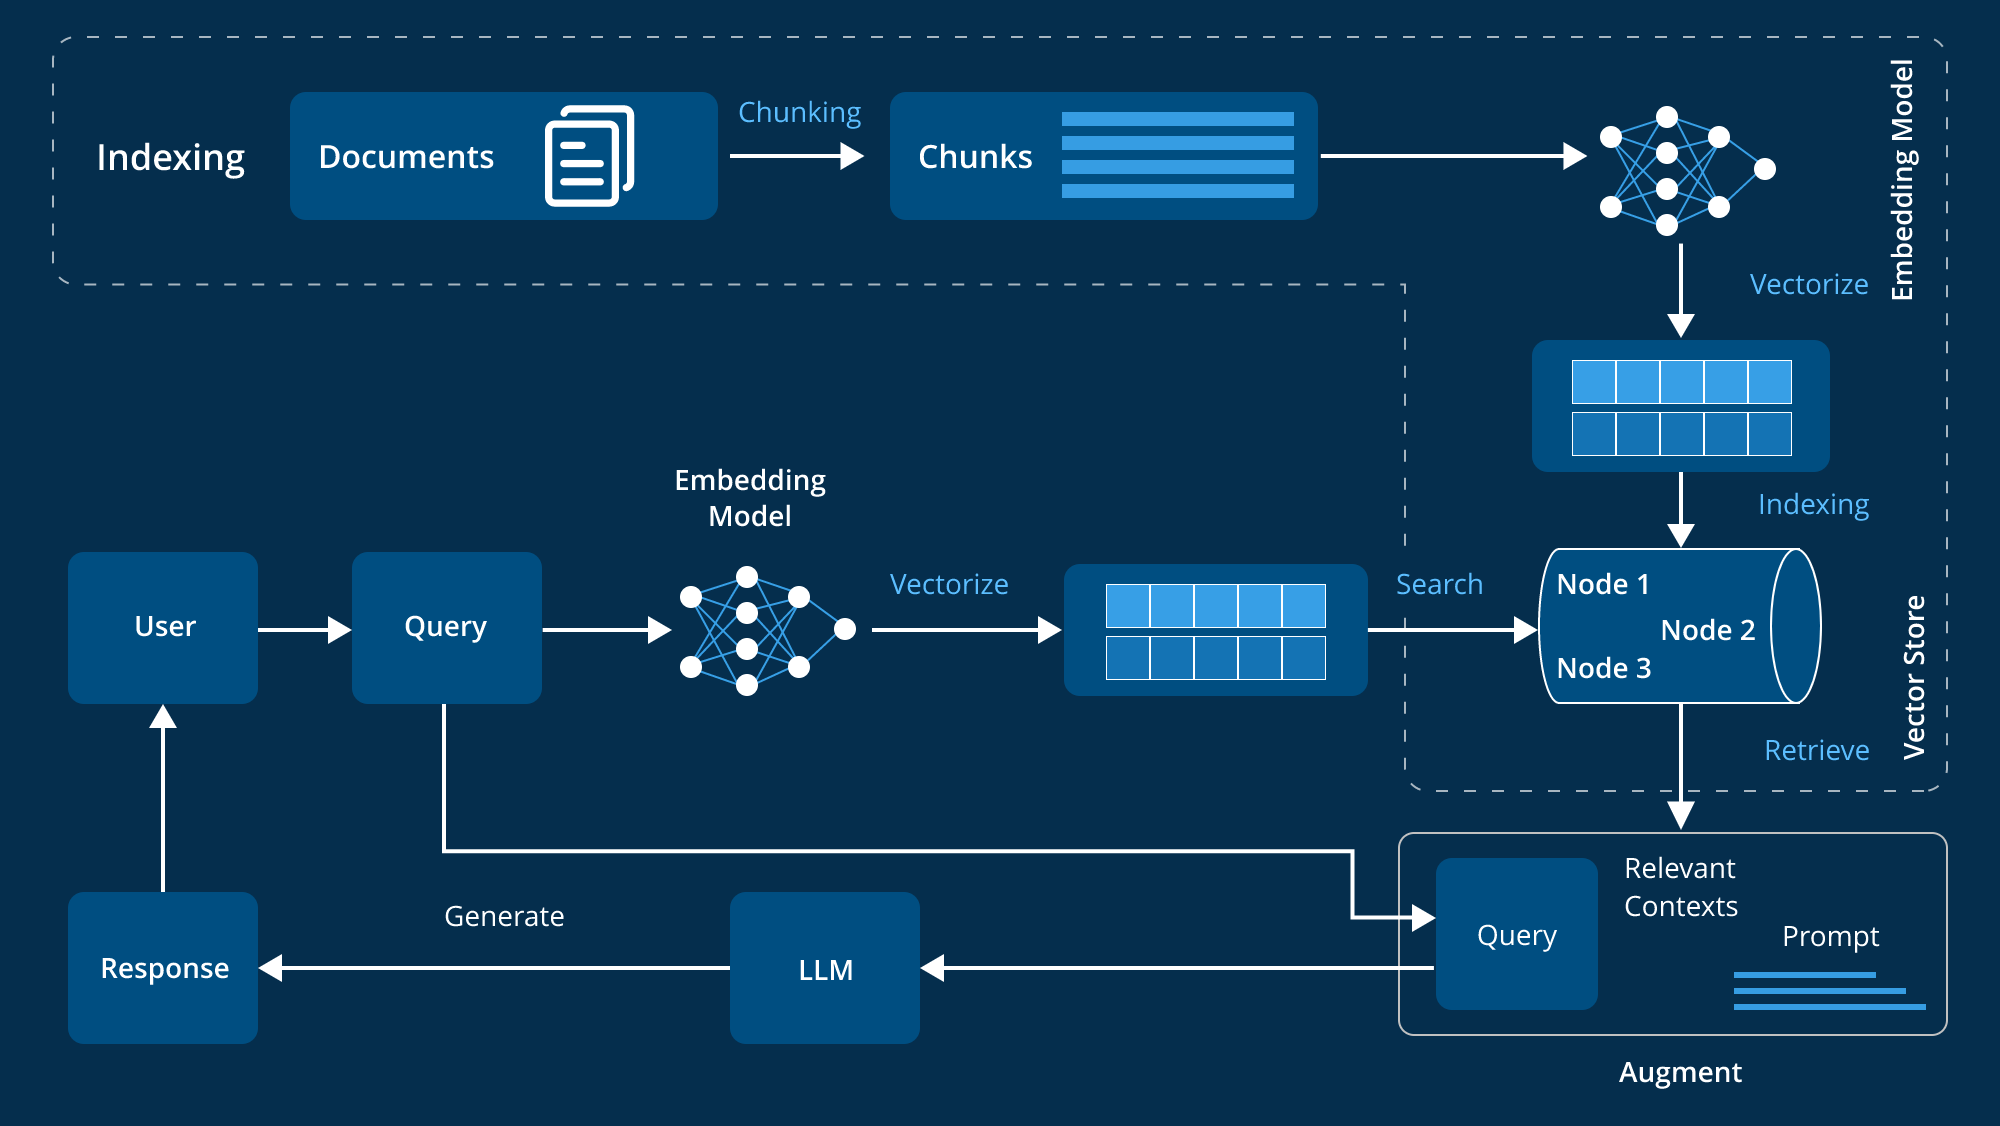

In [2]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.7/298.7 kB 17.2 MB/s eta 0:00:00


In [3]:
!pip install -q transformers accelerate bitsandbytes langchain einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00


In [4]:
!pip install -q sentence_transformers

In [5]:
!pip install -q llama-index==0.9.39

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.4 MB/s eta 0:00:00


In [6]:
from llama_index import SimpleDirectoryReader, VectorStoreIndex, ServiceContext
# from langchain.chat_models import ChatOpenAI
from llama_index.llms import HuggingFaceLLM
from llama_index.prompts.prompts import SimpleInputPrompt

In [7]:
!mkdir Data

In [8]:
# Extracting the content
document  = SimpleDirectoryReader(input_files=["/content/Data/fintech business.pdf"]).load_data()

In [9]:
document

[Document(id_='b6b2f78d-7eb9-49ee-81c5-c86b2c911e85', embedding=None, metadata={'page_label': '1', 'file_name': 'fintech business.pdf', 'file_path': '/content/Data/fintech business.pdf', 'file_type': 'application/pdf', 'file_size': 2778225, 'creation_date': '2025-01-31', 'last_modified_date': '2025-01-31', 'last_accessed_date': '2025-01-31'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n \n \n  \nBIS Papers \nNo 117 \n \n \nFintech and the digital \ntransformation of financial \nservices: implications for market \nstructure and public policy  \nby Erik Feyen, Jon Frost, Leonardo Gambacorta, Harish \nNatarajan and Matthew Saal \n \nMonetary and Economic Department \nJuly 2021 \n   \n  JEL classification: E51, G23, O31. \nKeywords: big tech, fintech,

In [10]:
system_prompt = """
you are a Q&A assistant. your goal is to answer the questions as accurately
as possible based on the instruction and context provided by the user
"""

query_wrapper_prompt = SimpleInputPrompt("<|USER|>{query_str}<|ASSISTANT|>")

In [11]:
!rm -rf ~/.cache/huggingface


In [12]:
# logging into huggin face
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
The token `simple` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pus

In [13]:
## gettiing the mistral model v3
import torch
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    system_prompt=system_prompt,
    tokenizer_name="mistralai/Mistral-7B-Instruct-v0.3",
    model_name="mistralai/Mistral-7B-Instruct-v0.3",
    query_wrapper_prompt=query_wrapper_prompt,
    device_map="auto",
    # tokenizer_kwargs={"trust_remote_code":True},
    model_kwargs={"torch_dtype":torch.float16, "load_in_8bit":True}
)

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [14]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.0 MB/s eta 0:00:00


In [15]:
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index import ServiceContext
from llama_index.embeddings import LangchainEmbedding

In [16]:
# downloading the embed model
embed_model = LangchainEmbedding(
    HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
)

<ipython-input-16-02110ee45519>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
#chunking

service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm, #wrapping the llm model
    embed_model=embed_model #embeding model
)

In [18]:
#vector DB
index = VectorStoreIndex.from_documents(document, service_context=service_context)

In [19]:
#knowledge based conneted with llm

query_engine = index.as_query_engine()

In [20]:
query = "What is fintech business?"
response = query_engine.query(query)
print(response)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Fintech business refers to the use of technology and innovation to improve and automate the delivery and use of financial services. It includes a broad range of activities such as mobile payments, digital lending, robo-advisory, and blockchain technology. The goal is to reduce costs, increase efficiency, and make financial services more accessible to a wider population. The context provided mentions that fintech can enable customization of financial services, reduce fixed and marginal costs of producing financial services, and potentially construct a range of state-contigent products through smart contracts or other emerging technologies.


In [ ]:
# ## gettiing the mistral model v3
# import os
# import torch
# from huggingface_hub import hf_hub_download

# hf_token = os.getenv("HF_TOKEN")

# # Download the config.json file with your token
# config_file = hf_hub_download(
#     repo_id="mistralai/Mistral-7B-Instruct-v0.3",
#     filename="config.json",
#     token=hf_token # Replace with your actual token
# )

# llm = HuggingFaceLLM(
#     context_window=4096,
#     max_new_tokens=256,
#     generate_kwargs={"temperature": 0.0, "do_sample": False},
#     system_prompt=system_prompt,
#     tokenizer_name="mistralai/Mistral-7B-Instruct-v0.3",
#     model_name="mistralai/Mistral-7B-Instruct-v0.3",
#     query_wrapper_prompt=query_wrapper_prompt,
#     device_map="auto",
#     # tokenizer_kwargs={"trust_remote_code":True},
#     model_kwargs={"torch_dtype": torch.float16, "load_in_8bit": True, "token": hf_token }, # Pass the token to model_kwargs
# )

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# from huggingface_hub import HfApi

# api = HfApi()
# token =

# # Check if you have access
# models = api.list_models(author="mistralai", token=token)
# for model in models:
#     print(model.modelId)

mistralai/Mistral-Small-24B-Instruct-2501
mistralai/Mistral-Small-24B-Base-2501
mistralai/Mistral-Nemo-Instruct-2407
mistralai/Mistral-7B-Instruct-v0.2
mistralai/Mistral-7B-Instruct-v0.3
mistralai/Mistral-7B-v0.1
mistralai/Ministral-8B-Instruct-2410
mistralai/Pixtral-12B-2409
mistralai/Mixtral-8x7B-Instruct-v0.1
mistralai/Mistral-Large-Instruct-2411
mistralai/Mistral-7B-v0.3
mistralai/Codestral-22B-v0.1
mistralai/Mistral-Small-Instruct-2409
mistralai/Mistral-7B-Instruct-v0.1
mistralai/Mixtral-8x22B-Instruct-v0.1
mistralai/Mamba-Codestral-7B-v0.1
mistralai/Mistral-Nemo-Base-2407
mistralai/Pixtral-Large-Instruct-2411
mistralai/Mixtral-8x7B-v0.1
mistralai/Mixtral-8x22B-v0.1
mistralai/Mathstral-7B-v0.1
mistralai/Mistral-Large-Instruct-2407
mistralai/Pixtral-12B-Base-2409


In [ ]:
# https://www.youtube.com/watch?v=qN_2fnOPY-M